#Employee Attrition EDA
Kaizen Team 


## Abstract
This analysis deals with exploring different categorical and quantitative variables and their relationship to employee attrition. We will begin this analysis with a general overview to see how the data set is organized, calculate and visualize the correlation between the different variables and employee attrition. 

In [3]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [8]:
# Load dataset
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Checking Data

In [9]:
# Data Checking (General Information form Dataframe)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
# check duplicate rows
duplicate = df[df.duplicated()]
print(duplicate)

print('Jumlah data duplicate',df.duplicated().sum())

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []
Jumlah data duplicate 0


In [11]:
nums = df.select_dtypes('number').columns.tolist()
cats = df.select_dtypes('object').columns.tolist()

In [12]:
print(nums) 
print(cats)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [13]:
df[nums].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Dari output di atas dapat dilihat bahwa:
- Semua tipe data sudah sesuai
- Tidak ada data duplikat
- Tidak ada kolom yang memiliki nilai yang kosong atau null
- Kolom `EmployeeCount`, `EmployeeNumber` dan `StandardHours` hanya memiliki 1 nilai
- Kolom Daily Rate akan dipakai untuk mewakili hourlyrate dan monthlyrate
-  Kolom `DistanceFromHome`, `MonthlyIncome`, `NumCompaniesWorked`, `PercentSalaryHike`, `TotalWorkingYears`, `YearsInCurrentRole`, `YearsSinceLastPromotion` dan `YearsWithCurrManager` tampaknya skew ke kanan (long-right-tail)
- Untuk kolom yang memiliki 1 nilai akan di drop pada saat data pre-processing

In [14]:
df[cats].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [15]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [16]:
# Pie chart Attrition
colors = ['#5B7DB1', '#FF6B6B']
fig = go.Figure(data=[go.Pie(labels=['No','Yes'], values=df['Attrition'].value_counts())])
fig.update_layout(autosize=False, width=400, height=350)
fig.update_traces(marker=dict(colors=colors))
fig.show()

Dapat dilihat bahwa: 
1. No-attrition data mendominasi dan kita akan melakukan SMOTE pada data Yes-Attrition. Persentase data attrion Yes : No = 16,1% : 83,9%
2. Kita akan aplikasikan teknik encoding pada kolom: Attrition, Gender and OverTime
3. Kita akan menggunakan teknik one-hot encoding pada columns : Business Travel, Department, Education Field, Job Role, Marital Status
4. Data categoric didominasi oleh pegawai yang berusia diatas 18 tahun (Over18), tidak attrion (Attrition), jarang berpergian / perjalan bisnis (BusinessTravel), tidak lembur (OverTime), dan berasal dari department resert & development (Department) serta berjenis kelamin laki-laki(Gender)
5. Data `Over18` ternyata hanya memiliki 1 nilai, sehingga akan di drop pada saat data pre-processing

# Univariate Analysis

## Mendeteksi Outliers dengan Boxplot

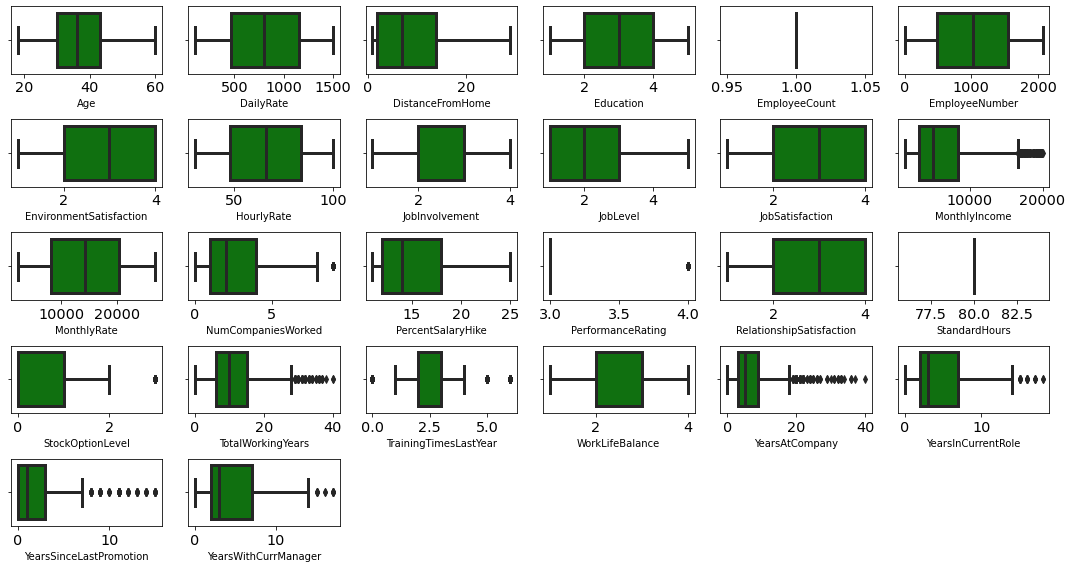

In [17]:
features = nums
plt.figure(figsize=(15, 8))
for i in range(0, len(features)):
    plt.subplot(5, len(features)/4, i+1)
    sns.boxplot(x=df[features[i]], color='green')
   #plt.xlabel(features[i])
    plt.tight_layout()

- Outliers terlihat pada kolom `MonthlyIncome`,`TotalWorkingYears`,  `YearsAtCompany`,`YearsInCurrentRole`, `YearsSinceLastPromotion`, dan `YearsWithCurrManager`
- Dari boxplot juga tampak mana distribusi yang terlihat agak skewed yaitu `MonthlyIncome`,`PerentSalaryHike`, `TotalWorkingYears`,  `YearsAtCompany`, dan `YearsSinceLastPromotion`
- Data `EmployeeCount` dan `StandardHours` hanya memiliki 1 nilai.
- Data `EmployeeNumber` kita abaikan karena semua unik
- Pada saat data pre-processing outliers akan dibuang/dihapus berdasarkan IQR atau Z-score, sedangkan untuk data yang hanya memiliki 1 nilai akan di drop. Serta distribusi yang tidak normal/skew akan ditransformasikan.


## Check Distribusi

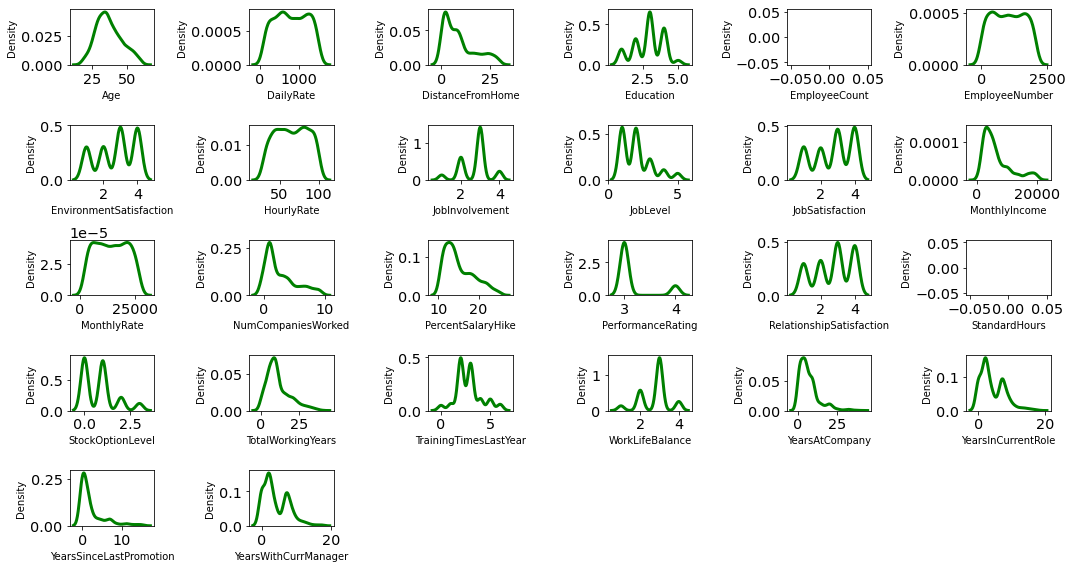

In [18]:
features = nums
plt.figure(figsize=(15, 8))
for i in range(0, len(nums)):
    plt.subplot(5, len(nums)/4, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

- Kolom `Age` tampak sudah mendekati distribusi normal
- Kolom `DistanceFromHome`, `MonthlyIncome`, `PercentSalaryHike`, `NumCompaniesWorked`,`YearsAtCompany`,`YearsSinceLastPromotion` sedikit skewed
- Kolom `Education`, `EnvironmentSatisfication`, `JobInvolvememt`, `JobLevel`, `JobSatisfication`, `PerformanceRating`, `RelationshipSatisfication`, `StockOptionLevel`, `WorkLifeBalance` memiliki distribusi bimodal
- Untuk distribusi yang tidak normal atau skew akan dilakukan transformasi pada saat data pre-processing

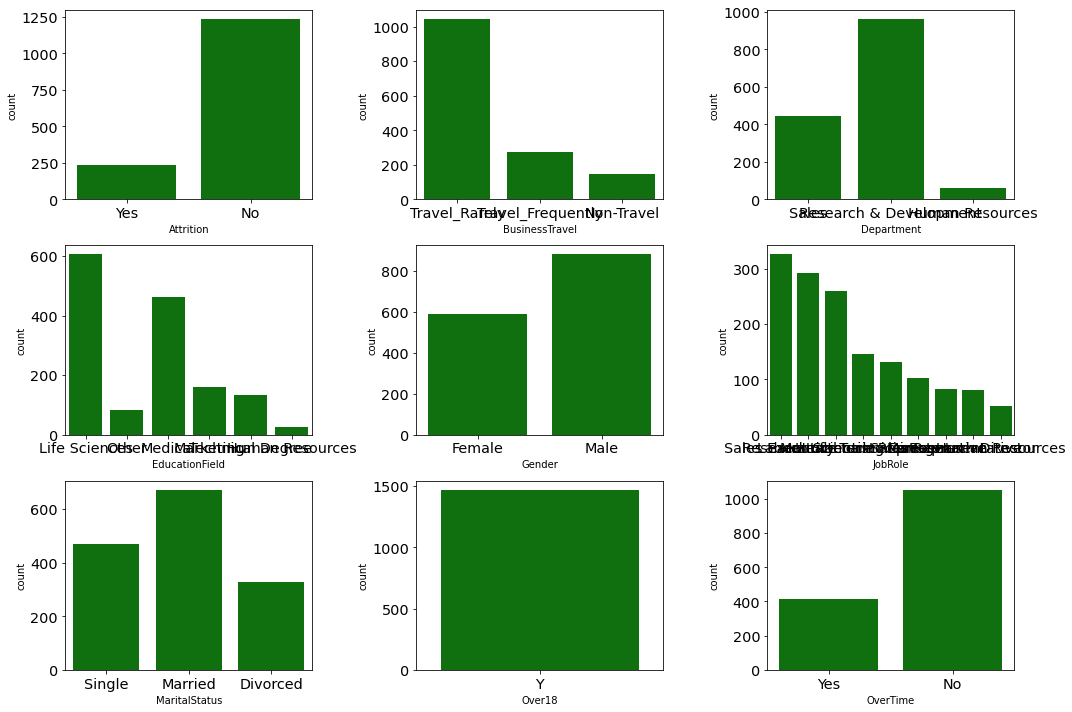

In [19]:
plt.figure(figsize=(15, 10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[cats[i]], color='green', orient='v')
    plt.tight_layout()

Distribusi dari `Attrition`, `BusinessTravel`, `Department`,`EducationField`, `Gender`, dan `OverTime` didominasi oleh 1-2 nilai

# Bivariate Analysis

### Tanpa Membuang Outliers

In [20]:
df1 = pd.read_csv('HR-Employee-Attrition.csv')

In [21]:
#Kita akan merubah nilai dari kolom attrition menjadi 1 dan 0
mapping_attrition = {
    'No' : 0,
    'Yes' :1
}
df1['Attrition'] = df1['Attrition'].map(mapping_attrition)
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [22]:
df1.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


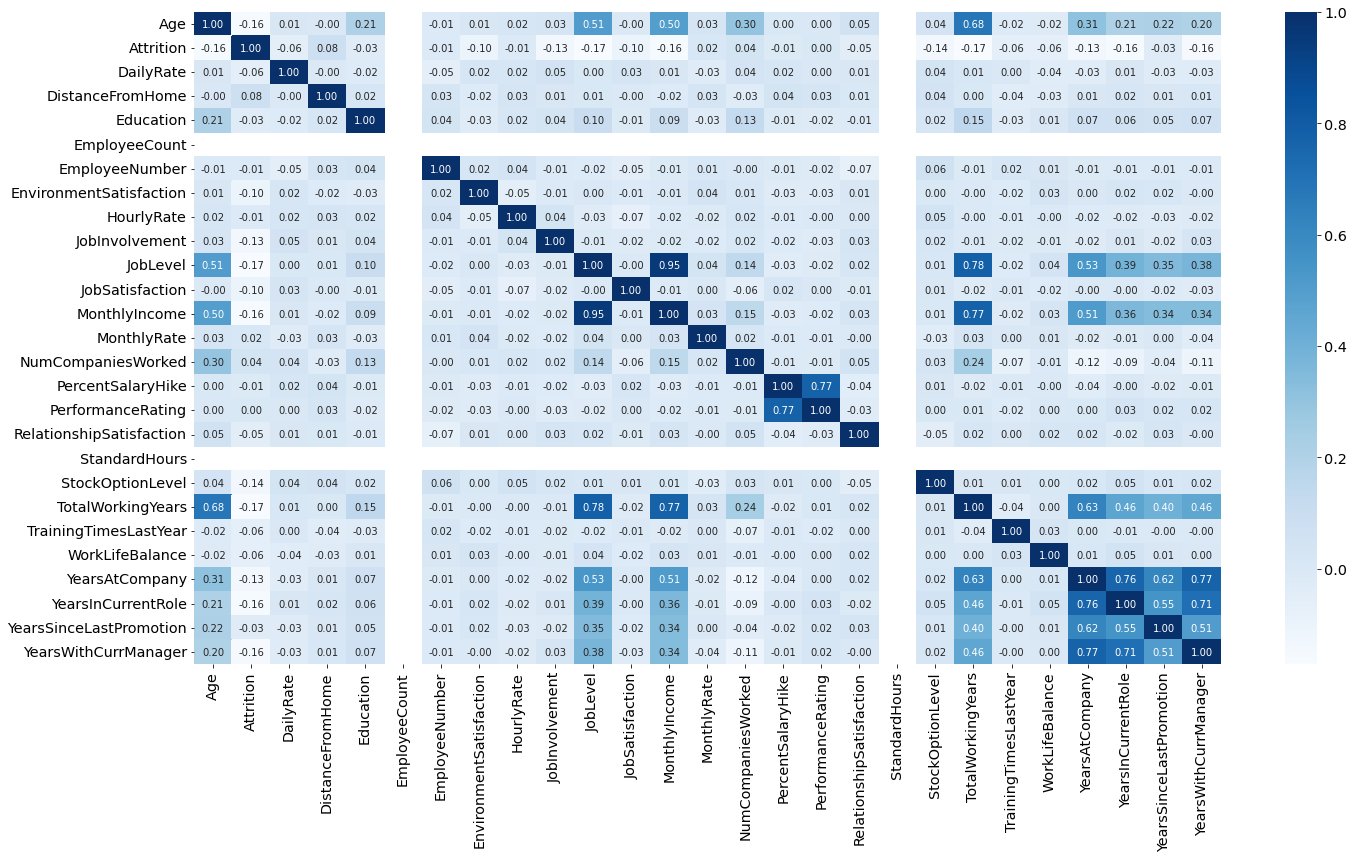

In [35]:
# correlation heatmap
plt.figure(figsize=(23, 12))
sns.heatmap(df1.corr(), cmap='Blues', annot=True, fmt='.2f')

- Secara linear, korelasi kolom target (`Attrition`) dengan kolom fitur numerikal lainnya terlihat memiliki korelasi yang lemah. Tidak adanya korelasi yang kuat dengan kolom target bukan berarti kolom - kolom tersebut tidak bisa dilakukan training di dalam algoritma machine learning, karena korelasi tidak menandakan kausalitas.


By analysing the correlations in the heatmap we derive that the following characteristics have high correlations : 
- Salary increase (PercentSalaryHike) and performance evaluation (PerformanceRating) : employee who receive an increase in salary tend to be more productive **(0.77)**
- Salary (MonthlyIncome) and employment level (JobLevel) : employee with greater seniority tend to earn more **(0.95)**
- Spend years of work in the company (YearsAtCompany), spent years with current manager (YearsWithCurrManager) and spent years in the current role (YearsInCurrentRole) : this would seem to highlight the absence of professional growth
- Company tends to appreciate the performance (PerformanceRating) with the increament of salary (PercentSalaryHike) (0.77)

In [26]:
plt.figure(figsize=(20, 20))
sns.pairplot(df1, diag_kind='kde')

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f48a04f28c0> (for post_execute):


KeyboardInterrupt: ignored

<Figure size 1440x1440 with 0 Axes>

Error in callback <function flush_figures at 0x7f48a04f93b0> (for post_execute):


KeyboardInterrupt: ignored

Dari pair plot diatas menunjukan tidak ada korelasi linier antara target Attrition dengan kolom yang lain (feature)

KeyboardInterrupt: ignored

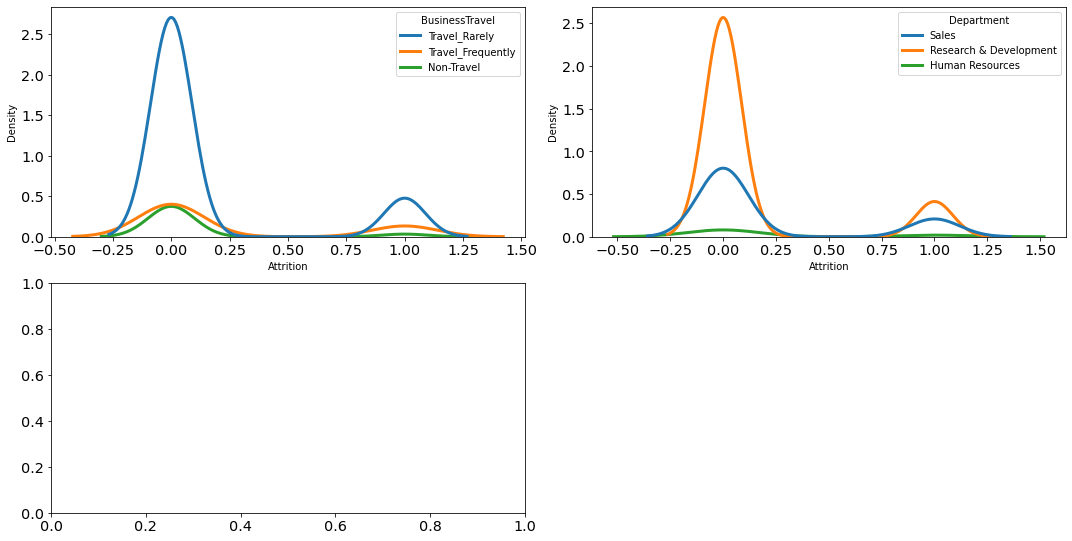

In [25]:
cats = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
fig = plt.figure(figsize=(15,15))
features = cats
for i in range(0, len(features)):
    ax = fig.add_subplot(5,2,i+1)
    plt.subplot(4, 2, i+1) 
    sns.kdeplot(data=df1, x='Attrition', hue=features[i])
    plt.tight_layout()

Dari output diatas dapat dilihat bahwa:
- Karyawan yang melakukan travel_rarely dan dari departemen research & development cenderung beresiko untuk attrition, sedangkan untuk departemen sales dan human resources lebih sedikit beresiko.
- Untuk job role sales executive, laboratory technician dan research scientist memiliki kecenderungan resiko lebih tinggi untuk attrition dibandingkan dengan job role yang lain
- Untuk marital status memiliki kecenderungan yang sama untuk attrition
- Begitu juga karyawan yang overtime atau tidak, memiliki kecenderungan yang sama untuk attrition

Seperti yang kita lihat pada distribusi plot, jumlah data Attrition "Yes" hanya 16,1%. Sehingga densitynya terlihat sangat timpang.




### Dengan Menghapus Outliers

In [73]:
df2 = pd.read_csv('HR-Employee-Attrition.csv')

In [74]:
df2.shape

(1470, 35)

In [ ]:
from scipy import stats

In [75]:
#z_scores = stats.zscore(df)
#calculate z-scores of `df`

#abs_z_scores = np.abs(z_scores)
#filtered_entries = (abs_z_scores < 3).all(axis=1)
#new_df = df[filtered_entries]

#print(new_df)

In [76]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df2[ft].quantile(0.75)
    IQR = Q3 - Q1

    low_limit = Q1 - (1.5*IQR)
    high_limit = Q3 + (1.5*IQR)

    index_outliers = df.index[(df[ft] < low_limit) | (df[ft] > high_limit)]

    return index_outliers

In [77]:

# Menghapus outliers di beberapa kolom
#index_list = []
#for feature in ['MonthlyIncome','TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']:
    #index_list.extend(outliers(df2, feature))

In [78]:
#Menghapus outliers di semua kolom dengan tipe data numerik
index_list = []
nums = df2.select_dtypes('number').columns.tolist()
for feature in nums:
    index_list.extend(outliers(df2, feature))

In [86]:
def remove(df,index_outliers):
    index_outliers = sorted(set(index_list))
    df_new = df.drop(index_outliers)
    return df_new

In [87]:
df2_new = remove(df2,index_list)

In [88]:
df2_new.shape

(779, 35)

In [89]:
#Mengubah nilai dari kolom attrition menjadi 1 dan 0
mapping_attrition = {'No':0,
                     'Yes':1}
df2_new['Attrition'] = df2_new['Attrition'].map(mapping_attrition)
df2_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7
11,29,0,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8


In [90]:
df2_new.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.171781,0.034746,0.042349,0.233423,NaN,0.010363,0.004516,0.024751,0.043539,0.369568,0.012422,0.351346,0.023551,0.327157,0.031315,NaN,0.075076,NaN,0.070395,0.580776,0.076635,0.017232,0.115975,0.101756,0.082488,0.087269
Attrition,-0.171781,1.000000,-0.057675,0.075613,-0.045979,NaN,0.002388,-0.116592,0.011265,-0.133460,-0.168421,-0.076020,-0.160598,0.045583,0.023896,-0.065935,NaN,-0.076040,NaN,-0.198342,-0.195474,0.035248,-0.078955,-0.190790,-0.171889,-0.014134,-0.164155
DailyRate,0.034746,-0.057675,1.000000,-0.019792,-0.052777,NaN,-0.040787,0.086427,0.006573,0.035046,0.041131,0.025407,0.045043,-0.033416,0.062562,0.061753,NaN,0.015467,NaN,0.030141,0.054578,-0.043031,-0.047661,0.002481,0.018912,-0.038244,-0.012209
DistanceFromHome,0.042349,0.075613,-0.019792,1.000000,-0.016105,NaN,0.048163,-0.040009,0.037917,0.008529,0.100998,0.018604,0.059501,0.073670,0.010848,0.013641,NaN,-0.009791,NaN,0.083603,0.085516,-0.028655,-0.059067,0.013181,0.023331,0.023907,-0.000210
Education,0.233423,-0.045979,-0.052777,-0.016105,1.000000,NaN,0.088486,-0.030471,-0.016824,0.047752,0.145525,-0.023224,0.134433,-0.033629,0.091021,0.002046,NaN,0.015623,NaN,0.061012,0.144084,0.050811,0.040351,0.107769,0.089378,0.072148,0.052730
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.010363,0.002388,-0.040787,0.048163,0.088486,NaN,1.000000,-0.020999,0.017804,-0.015644,-0.000891,-0.055043,-0.007908,-0.017694,0.028678,-0.005542,NaN,-0.041111,NaN,0.053222,0.003744,0.035074,-0.059167,0.049611,-0.000292,0.019135,0.024902
EnvironmentSatisfaction,0.004516,-0.116592,0.086427,-0.040009,-0.030471,NaN,-0.020999,1.000000,-0.004304,0.018442,-0.018666,-0.058437,-0.040958,0.032384,0.004391,-0.017269,NaN,-0.006223,NaN,0.053516,-0.021360,0.056419,-0.004191,0.062237,0.071654,0.083589,0.046292
HourlyRate,0.024751,0.011265,0.006573,0.037917,-0.016824,NaN,0.017804,-0.004304,1.000000,0.031118,0.029820,-0.065851,0.039659,-0.031873,0.035628,-0.027490,NaN,0.030705,NaN,0.064765,0.010280,0.014415,-0.039402,-0.000882,0.000838,0.008365,-0.002778
JobInvolvement,0.043539,-0.133460,0.035046,0.008529,0.047752,NaN,-0.015644,0.018442,0.031118,1.000000,0.006477,0.029254,-0.025310,-0.000217,0.007943,-0.003051,NaN,0.048787,NaN,0.045745,0.033800,0.039633,0.035202,0.034692,0.005867,0.033283,0.038227


* Setelah dilakukan drop outliers pada kolom numerikal, nilai pada kolom `PerformanceRating` ikut terhapus.
* Semua baris bernilai 'No' pada kolom `Attrition` juga akan terhapus apabila dilakukan drop outlier dengan dilakukan *label encoding*.
* Kemungkinan terhapusnya nilai di atas karena nilai tersebut teridentifikasi sebagai outlier.
* Tidak semua outlier perlu dihapus, maka nilai tersebut bisa dipertahankan.

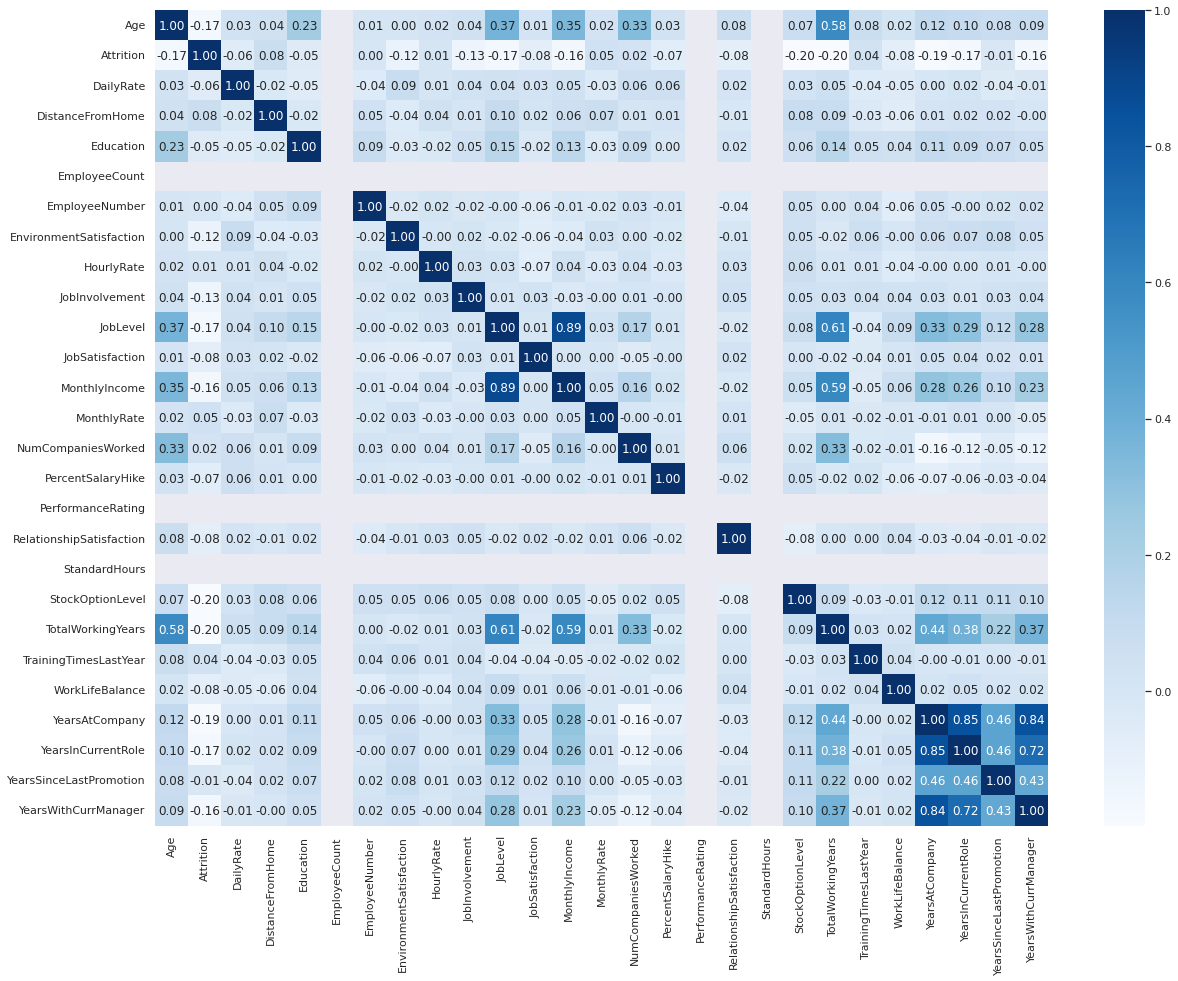

In [91]:
# correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df2_new.corr(), cmap='Blues', annot=True, fmt='.2f')

Setelah melakukan drop outliers pada kolom numerikal, dilakukan pearson correlation heatmap dan dapat dilihat bahwa:
- Secara linear, korelasi kolom target (`Attrition`) dengan kolom fitur numerikal lainnya terlihat memiliki korelasi yang lemah. Tidak adanya korelasi yang kuat dengan kolom target bukan berarti kolom - kolom tersebut tidak bisa dilakukan training di dalam algoritma machine learning, karena korelasi tidak menandakan kausalitas.

Beberapa kolom memiliki korelasi kuat dan potensi redundan, sehingga dapat dipilih salah satu saja
- Pasangan kolom dengan korelasi positif cukup kuat sampai sangat kuat (>=0.5) adalah `Age-TotalWorkingYears` (0.58), `JobLevel-TotalWorkingYears` (0.61), `MonthlyIncome-TotalWorkingYears` (0.59), `YearsInCurrentRole-YearsWithCurrManager` (0.72), `YearsAtCompany-YearsWithCurrManager` (0.84),  `YearsAtCompany-YearsInCurrentRole` (0.85), , `JobLevel-MonthlyIncome` (0.89)

### Business Insight

#### MonthlyIncome Variation dan TotalWorkingYears

Text(0.5, 1.0, 'Distribution of Employee Atrition Based on Total Working Years and Mothly Income')

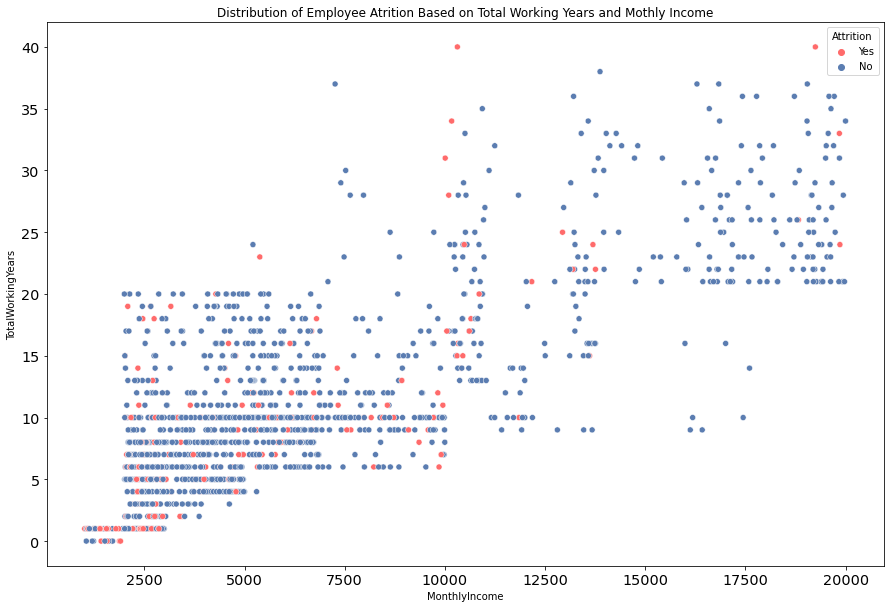

In [38]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x= df['MonthlyIncome'], y= df['TotalWorkingYears'], hue = df['Attrition'],palette=['#FF6B6B','#5B7DB1'])
plt.title('Distribution of Employee Atrition Based on Total Working Years and Mothly Income')

Text(0.5, 1.0, 'Attrition based on Total Working Years')

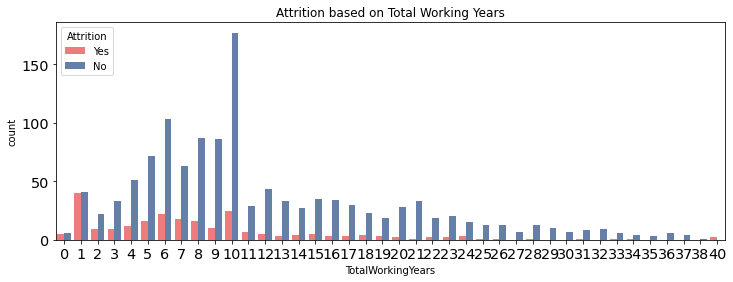

In [39]:
sns.countplot(x = df['TotalWorkingYears'], hue='Attrition', data = df, palette=['#FF6B6B','#5B7DB1'])
plt.title('Attrition based on Total Working Years')

**Insight :**

1. Dari grafik scatterplot terlihat bahwa `MonthlyIncome` bertambah seiring dengan `TotalWorkingYears` dan pengalaman 
2. Jumlah karyawan yang attrition lebih banyak terjadi pada karyawan yang memiliki `TotalWorkingYears` dan `MonthlyIncome` yang lebih rendah

**Rekomendasi:**
1. Perlu dievaluasi faktor yang menyebabkan karyawan dengan `TotalWorkingYears` rendah lebih banyak yang attrition.


#### Hourly rate with respect to Job Role and Gender

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

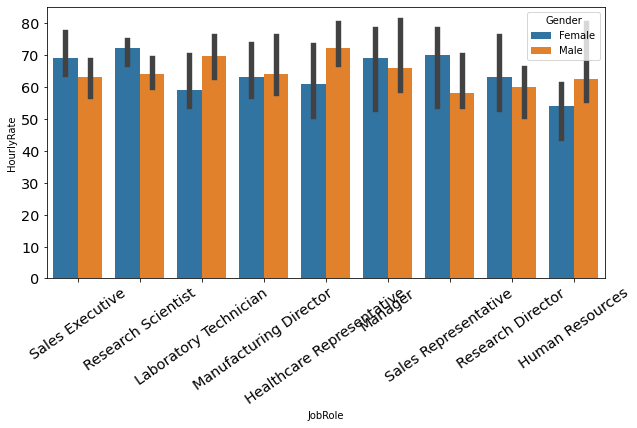

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['JobRole'], y=df['HourlyRate'], estimator = np.median, hue = df['Gender'])
plt.xticks(rotation=35)

In [40]:
df.groupby(['Gender','JobRole']).agg({'JobInvolvement' : 'median'})

JobInvolvement
Gender JobRole                                  
Female Healthcare Representative             3.0
       Human Resources                       3.0
       Laboratory Technician                 3.0
       Manager                               3.0
       Manufacturing Director                3.0
       Research Director                     3.0
       Research Scientist                    3.0
       Sales Executive                       3.0
       Sales Representative                  3.0
Male   Healthcare Representative             3.0
       Human Resources                       3.0
       Laboratory Technician                 3.0
       Manager                               3.0
       Manufacturing Director                3.0
       Research Director                     3.0
       Research Scientist                    3.0
       Sales Executive                       3.0
       Sales Representative                  3.0

**Insight :**
1. Adanya perbedaan median upah perjam karyawan laki-laki dan perempuan. 
2. Sedanngkan antara `JobRole` dan `JobInvolvement` baik karyawan laki-laki maupun perempuan memiliki nilai median yang sama yaitu 3 (High) 

**Rekomendasi :**
1. Perlu dikaji ulang tentang penetuan upah perjam antara karyawan perempuan dan laki-laki. Mungkin untuk pekerjaan di bagian teknis gajinya bisa disepadankan karena mereka melakukan pekerjaan yang sudah menjadi SOP

#### Level of influence, income and their performance




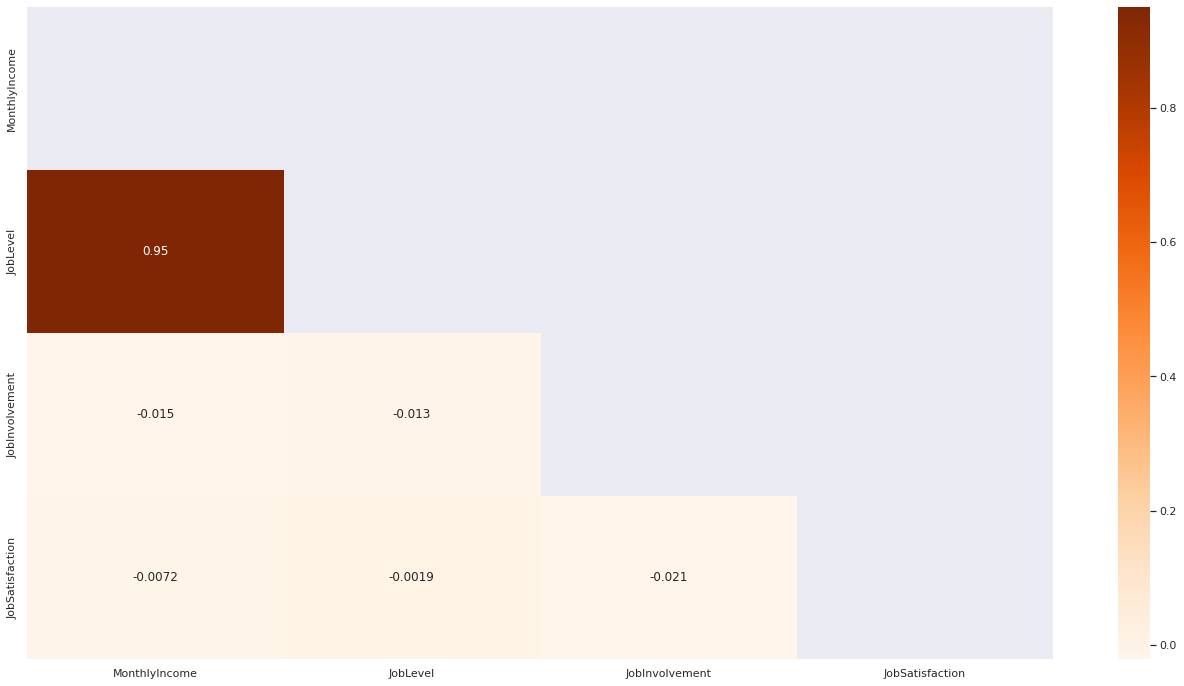

In [72]:
# correlation heatmap
df3=df1[['MonthlyIncome','JobLevel','JobInvolvement','JobSatisfaction']]
plt.figure(figsize=(23, 12))

# creating mask
mask = np.triu(np.ones_like(df3.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df3.corr(), cmap="Oranges", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

This is interesting. As we can see, job level has strong correlation with monthly income. It is means company spends more money to them. But as we can see, the higher of level do not correlate with the their involvement and satisfaction. 

Job involvement has attracted attention as a key contributing factor to an organization’s success. According to [1] , job involvement is seen as means of aiding productivity and creating work situations in which individual and organizational goals are integrated. This involvement leads to enhanced satisfaction and increased productivity for the organization. Job involvement has also been reported to be a top organizational priority as fostering employee involvement can enhance an organizational effectiveness [2] 

[1]*Mgedezi, S., Toga, R. and Mjoli, T. (2014) Intrinsic Motivation and Job Involvement on Employee Retention: Case Study—A Selection of Eastern Cape Government Departments. Mediterranean Journal of Social Sciences, 5, 2119-2126.
https://doi.org/10.5901/mjss.2014.v5n20p2119*
[2]	*Nwibere, B.M. (2014) Interactive Relationship between Job Involvement, Job Satisfaction, Organizational Citizenship Behaviour, and Organizational Commitment in Nigerian Universities. International Journal of Management and Sustainability, 3, 321-340.*

# Recommendation
Should place extra emphasis on increasing employee job involvement in order to enhance job satisfaction. The effect of job satisfaction on organizational commitment was also found positive and significant. This result is in line with some previous studies [3]. As we know also, their monthly income also place on high level and we must expect more from their involvement.  

[3]	Gunlu, E., Aksarayli, M. and Percin, N.S. (2010) Job Satisfaction and Organizational Commitment of Hotel Managers in Turkey. International Journal of Contemporary Hospitality Management, 22, 693-717.
https://doi.org/10.1108/09596111011053819